 project : Commodity Price Prediction
 

In [1]:
# import required libraries 
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt 

In [2]:
# scikit-learn modules for model building 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# loading the dataset
df=pd.read_csv("gld_price_data.csv")

Displaying first five rows

In [6]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Data Preprocessing

In [7]:
# converting data column into datetime format
df['Date']=pd.to_datetime(df['Date'])

In [9]:
# droping the date column
df = df.drop('Date', axis=1)

In [10]:
# Check for missing values in each column
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


Feature Selections

In [12]:
# Independent Variables (Features)
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']]


In [13]:
# Dependent Variable (Target)
y = df['GLD']

Train test split

In [14]:
# Split data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Model training

In [15]:
# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predictions

In [16]:
y_pred = model.predict(X_test)

Model evaluation

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Performance:
MAE : 5.6959006442692885
MSE : 56.165594215006024
RMSE: 7.494370835167287
R2 Score: 0.8975640982991402


visualization

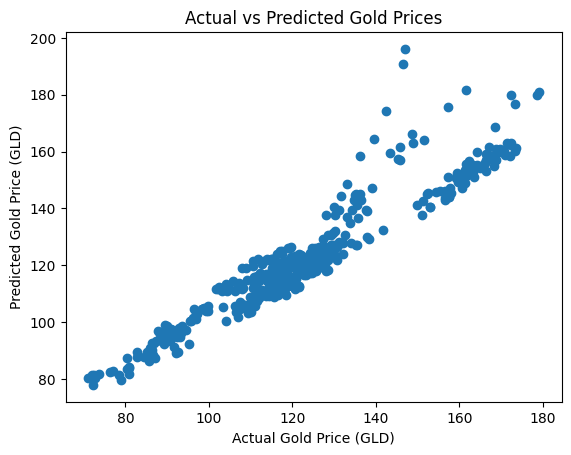

In [18]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gold Price (GLD)")
plt.ylabel("Predicted Gold Price (GLD)")
plt.title("Actual vs Predicted Gold Prices")
plt.show()